# E10 — Exercises on Calcium Handling

In this notebook we look at some exercises to explore intracellular calcium handling a bit more hands on. Compared to previous sessions, there is a stronger focus on discussion and work with pen and paper, and a bit less on actual modeling.

This notebook contains the following exercises:

* [Exercise 1: A Simple Calcium Cycling Model](#1)
* [Exercise 2: Thermodynamic Limits of SERCA](#2)
* [Exercise 3: Thermodynamics of the NCX](#3)
* [Exercise 4: A More realistic Cardiac Calcium Dynamics model](#4)

<a id="1"></a>
## Exercise 1: Thermodynamic Limits of SERCA

The sarco/endoplasmic reticulum calcium ATPase (SERCA) pump is responsible for pumping calcium into the SR from the cytosol in cardiomyocytes. This has to majorly important functions:
* Maintain a high SR load, which can give a rapid and strong calcium transient through the CICR mechanism
* Maintain very low levels of resting cytosolic calcium, important for allowing the myocyte to relax in between contractions

Ideally the SERCA pump would pump all available calcium from the cytosol into the SR. However, due to the diffusive pressure of calcium, there has to be some theoretical maximum for how large concentration gradients the SERCA pump can achieve. In this exercise you will analyze the thermodynamics of the problem to find this theoretical limit.

**Exercise 1a) Change in Gibbs Energy**

In the lecture on physical chemistry, L2, we introduced a quantity dubbed *Gibbs energy*. Recall now that for any spontaneous process, we must have that $\Delta G < 0$. Explain briefly why this is the case.

For every cycle of the SERCA pump, it pumps two calcium ions from the cytosol into the SR. This will incur a change in Gibbs energy of

$$\Delta G_{\rm pump} = 2RT \ln\left(\frac{\rm [Ca^{2+}]_{SR}}{\rm [Ca^{2+}]_i}\right),$$

It is generally the case that $ {\rm [Ca^{2+}]_{SR}} > {\rm [Ca^{2+}]_i}$. What does this mean for the value of $\Delta G_{\rm pump}$. Explain why this tells us that SERCA must expend energy to move calcium ions into the SR.

**Exercise 1b) Coupling processes**

SERCA is an ATPase, meaning it is an enzyme that can break down ATP molecules into ADP, a process that releases a bit of energy which SERCA can use. Explain why it must be the case that

$$\Delta G_{\rm pump} + \Delta G_{\rm ATP} < 0.$$

Where $G_{\rm ATP}$ is the change in Gibbs Energy we get from "spending" a single ATP molecule.


**Exercise 1c) Maximum concentration ratio**

Insert the expression from 2a into 2b and solve for ${\rm [Ca^{2+}]_{SR}}$. Show that this yields

$${\rm [Ca^{2+}]_{SR}} < {\rm [Ca^{2+}]_{i}} \times {\rm exp}\ \bigg[\frac{\Delta G_{\rm ATP}}{2RT}\bigg].$$

To find a specific value we will need to know the value of $\Delta G_{\rm ATP}$. Looking up the value in the literature reveals that this value changes with several factors. For the conditions inside a mammalian myocyte it will typically be in the range 50–70 kJ/mol. As no molecular machine, like SERCA, will ever be perfectly efficient, it makes sense to pick a number on the lower end of the scale or slightly below this.

Insert $\Delta G_{\rm ATP}$ to find a final estimate. It can be useful to know that for body temperature, $2RT \approx 5.2$ kJ/mol. What is the maximal concentration gradient SERCA can theoretically maintain across the SR membrane?

**Exercise 1d) The difference between theory and practice**

A commonly cited statement is that SERCA can maintain a calcium gradient of about 1:7000, i.e., the SR load can be at most 7000-fold higher than the cytosolic calcium. Compare this statement with the theoretical limit you found. If there are differences, discuss why this might be. Does it seem like SERCA is operating at its thermodynamic limit?

<a id="2"></a>
## Exercise 2: Thermodynamics of the NCX

The sodium-calcium exchanger (NCX) works by transporting 3 sodium ions (Na$^+$) in one direction, and simultaneously transporting 1 calcium ion in the opposite direction (Ca$^{2+}$). Crucially, NCX does not use any other source of energy, like ATP. Let us analyze the thermodynamics of this situation.


**Exercise 2a) Passive or active transport? (Discussion)**

Previously we have introduced the terms *passive* and *active* ion transport. From what you recall of these terms, would you classify the NCX activity as passive or active?


**Exercise 2b) Gibbs energy**

Explain why the change in Gibbs energy of one cycle of the NCX can be described as

$$\Delta G_{\rm NCX} = \Delta G_{\rm Ca} - 3\Delta G_{\rm Na}.$$

**Exercise 2c) Enter the Nernst potentials**

The change in Gibbs energy from moving a particle from inside to outside the cell depends both on the concentration gradient of the ion, but also the membrane potential. We have actually analyzed this exact scenario when we derived the Nernst potential. From that derivation we found that (We did not you expect to remember this expression, which is why we list it here):

$$\Delta G_{\rm X} = z_X F \big( E_{\rm X} - V \big).$$

Here $z_{\rm X}$ is the valency of ionic species X, $E_{\rm X}$ is the Nernst potential of species X, $F$ the Faraday constant and $V$ the membrane potential.

Insert $\Delta G_{\rm Na}$ and $\Delta G_{\rm Ca}$ to find a clean expression for $\Delta G_{\rm NCX}$.

**Exercise 2d) Reversial potential**

We know the system is at thermodynamic equilibrium when $\Delta G = 0$. This in turn means you can find the *reversial* potential of the NCX by solving the equation

$$\Delta G_{\rm NCX} = 0,$$

for the membrane potential $V$. Show that this results in

$$E_{\rm NCX} = 3E_{\rm Na} - 2E_{\rm Ca}.$$

Explain how this potential relates to the forward and reverse modes of the exchanger.

**Exercise 2e) Reversial potential in mV**

In L3 you computed the Nernst potentials under normal conditions and found that $E_{\rm Na} \approx 80$  mV and $E_{\rm Ca} \approx 120$ mV. (Though we expect the calcium Nernst potential to shift considerably during an AP). Insert these values to find $E_{\rm NCX}$ in terms of mV.

**Exercise 2f) The NCX during the action potential**

From your answer. Do we expect to see any reverse mode of NCX during a normal action potential? If so, where in the action potential would we expect to see calcium entering the cell through the NCX? When would we expect calcium to leave the cell?

<a id="3"></a>
## Exercise 3: A Simple Calcium Cycling Model

We start by implementing a simple calcium cycling model to explore intracellular calcium handling a bit more hands on. The model you implement is based on a work by Friel et al. (1995). The original model was made to explain experimental findings of caffine-induced calcium oscillations in sympatheic neurons. We use the model as propsed by Friel, but change a few of the variable names to be more consistent with how we present the material in L10/E10.

### Introducing the Model

The model proposed by Friel consists of three domains:
* The cytosol, inside the cell
* The sarcoplasmic reticulum (SR), a subdomain inside the cell
* The extracellular space, outside the cell.

We denote the concentration of calcium in each of these domains as $\rm [Ca^{2+}]_{\rm i}$, $\rm [Ca^{2+}]_{\rm SR}$ and $\rm [Ca^{2+}]_{\rm o}$ respectively. The first two of these are model states which change over time, while we assume the extracellular concentration to be constant.

There are four fluxes between these domains:
* There is an external calcium entry through the sarcolemma: $J_{\rm entry}$
* There is an extrusion of calcium through the sarcolemma: $J_{\rm extrusion}$
* There is a release of calcium from the SR: $J_{\rm rel}$
* There is an uptake of calcium back into the SR: $J_{\rm uptake}$.

We can summarize the model with the following figure.

<img src="fig/friel.svg" width=500>

**Exercise 1a) Linear currents**

In the very simplest case, we can assume the four currents to be completely linear, and only dependent on the concentration gradient across a given membrane. For instance, we can then model the influx current as

$$J_{\rm entry} = k_{\rm entry} \left( \rm [Ca^{2+}]_{\rm o} - \rm [Ca^{2+}]_{\rm i} \right).$$

Where $k_{\rm entry}$ would be the *flux rate*, a model parameter of units 1/s. 

* If we assume $\rm [Ca^{2+}]_{\rm o} > \rm [Ca^{2+}]_{\rm i}$, does $J_{\rm entry}$ become positive or negative? 

We also assume the release current to be proportional to the calcium difference between the SR and the cytosol. 

* Write out this current so that it is also positive when entering the cytosol, $J_{\rm rel} = ...$.

Because the uptake and extrusion currents are *active* transport and not passive, let us assume these are proportional to the cytosolic concentration alone, i.e.

$$J_{\rm extrusion} = k_{\rm extrusion} \times [{\rm Ca}^{2+}]_{\rm i}.$$

* Write out the same current for the uptake term, $J_{\rm uptake} = ...$.

**Exercise 1b) Concentration changes**

With the fluxes defined, write out the derivatives of the cytosolic and SR calcium in terms of the four fluxes. Be especially careful that you are consistent in terms of the sign of concentration differences, fluxes and concentration changes.

\begin{equation}
\frac{\rm d [Ca^{2+}]_i}{{\rm d}t} = \ldots,
\end{equation}

\begin{equation}
\frac{\rm d [Ca^{2+}]_{SR}}{{\rm d}t} = \frac{\ldots}{\gamma}.
\end{equation}

Here $\gamma$ is a unitless model parameter needed to account for the fact that the SR has a different volume to the cytosolic space. It has a value of $\gamma = 0.24$, meaning a movement of calcium from the SR to the cytosol will impact the SR concentration roughly four times more than the cytosolic calcium.

**Exercise 1c) Variable release rate**

If you read the original publication, it is not possible to find spontaneous calcium oscillations with purely linear fluxes, as one needs *calcium-induced calcium release* (CICR) to produce proper oscillations. Friel et al., therefore proposes to let the rate constant of the release current $k_{\rm rel}$ be a function of cytosolic calcium, so that it is low when cytosolic calcium is low, but it increases fast if cytosolic calcium grows. 

More specifically, they let

\begin{equation}
k_{\rm rel} = \kappa_0 + \kappa_1 \times \frac{\rm [Ca^{2+}]^n_{\rm i}}{K_{\rm d}^n + [{\rm Ca}^{2+}]_{\rm i}^n}
\end{equation}

What kind of equation is this?

**Exercise 3d) Implementing the RHS**

Fill in the code below to define the RHS of the system

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def rhs(t, y, Cao, k_entry, k_extrusion, k_uptake, kappa0, kappa1, Kd, n, gamma):
    # Split up the state vector
    Cai, CaSR = y
    
    # Define the linear fluxes
    J_entry = ...
    J_extrusion = ...
    J_uptake = ...
    
    # Compute the release rate (CICR)
    k_rel = ...
    J_rel = ...
    
    # Define the derivatives
    dCai_dt = ...
    dCaSR_dt = (...)/gamma
    
    # Return the derivatives
    return dCai_dt, dCaSR_dt

**Exercise 3e) Solving the model and plotting the solution**

Below we have defined all the parameters of the model. Use these parameters and solve the model for $t\in[0, 1000]$ seconds. As initial conditions use $\rm [Ca]_{\rm i} = 80$ nM and $\rm [Ca]_{\rm SR} = 4.0$ µM. Plot the solutions, $\rm [Ca]_{\rm i}$ and $\rm [Ca]_{\rm SR}$ in two different plots.

In [8]:
# Parameters
Cao = 1000 # µM

k_entry = 2e-5 # 1/s
k_extrusion = 0.132 # 1/s
k_uptake = 0.9 # 1/s
kappa0 = 0.013 # 1/s
kappa1 = 0.58 # 1/s
Kd = 0.5 # µM
n = 3.
gamma = 0.24

params = (Cao, k_entry, k_extrusion, k_uptake, kappa0, kappa1, Kd, n, gamma)

In [9]:
# Solve model with solve_ivp
T = ...
y0 = ...

solution = solve_ivp(...)

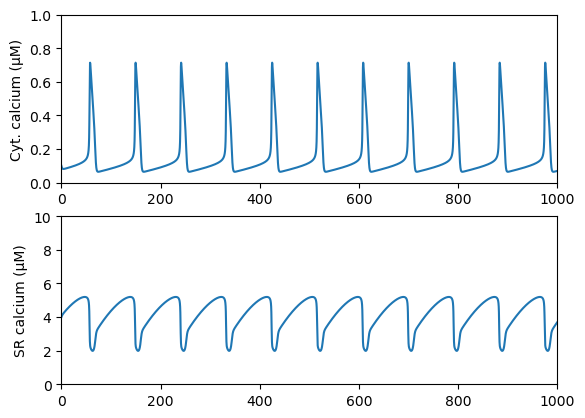

In [10]:
# Plot solutions
plt.plot(...)
plt.show(...)

plt.plot(...)
plt.show(...)

**Exercise 3f) Describing the solution**

Explain how the solutions look. You don't have to describe the exact mechanisms of what is going on, but you should explain in broad strokes where calcium is moving in the model. Does it seem reasonable that this is a model to explain a phenomenon called *calcium oscillations*?

**Exercise 3g) Changes in initial conditions (Widget)**

Use the widget below and play around with the initial conditions. Does the initial conditions matter? Why/Why not?

In [12]:
from L10_widget import CICRWidget

CICRWidget().initial_conditions_widget()

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='Cai_0', max=1.0), FloatSlid…

**Exercise 3h) Plotting the CICR rate**

The paper this model is based on is looking at *caffine induced* calcium oscillations. What caffine does is upregulate the release flux's dependency on cytosolic calcium, meaning CICR is stronger. Let us analyze this a bit closer. The release rate was modelled as

\begin{equation}
k_{\rm rel} = \kappa_0 + \kappa_1 \times \frac{\rm [Ca^{2+}]^n_{\rm i}}{K_{\rm d}^n + [{\rm Ca}^{2+}]_{\rm i}^n}
\end{equation}

Plot this curve for $\rm [Ca^{2+}]_{\rm i} \in [0, 2]$ µM.

If caffeine makes this function *steeper*, what model parameters could reflect this?





**Exercise 3i) Exploring the CICR model (Widget)**

Below we have made a widget that plots the release rate with adjustable parameters: $\kappa_0$, $\kappa_1$, $K_{\rm d}$, $n$. Play around with this widget and get a feel for what all four parameters do to the rate function. 

If we want a low release current at low calcium, and then a high release rate at high calcium, with a steep and swift shift. What parameters should be low, and which should be high?

In [14]:
from L10_widget import CICRWidget

CICRWidget().krel_widget()

interactive(children=(FloatSlider(value=0.1, description='kappa0', max=1.0), FloatSlider(value=0.6, descriptio…

**Exercise 3j) CICR sweet-spot (Widget)**

In the paper, they state that calcium oscillations are only found at certain levels of caffine. If there is no caffine, then the steepness of the CICR-function ($k_{\rm rel}$ in the model) is too low, and we get no oscillations. If there is too much caffine, then the system releases calcium too readily, and we also get no oscillations.

Attempt to shift either the $K_{\rm d}$ (point of half-saturation) or $n$ (the Hill coefficient) to be very high or low in the widget below. Do the oscillations disappear at either extreme? Hint: The model is a bit heavy, so I suggest you pull the sliders *slowly* to give the plot a chance to update.

In [1]:
from L10_widget import CICRWidget

CICRWidget().cicr_widget()

interactive(children=(FloatSlider(value=0.5, description='Kd', max=1.0), FloatSlider(value=3.0, description='n…

<a id="4"></a>
## Exercise 4: A More realistic Cardiac Calcium Dynamics model

This exercise is an extension of exercise 3. In Exercise 3, we implemented a simple calcium cycling model to study a simplified intracellular calcium subsystem. In this section we will include more accurate and detailed receptor formulations, and combine the calcium subsystem formulations with a calculation of the action potential. For this purpose we will work with a well established model, the Jafri et al. 1998 model. The following figure (from Jafri et al. 1998) shows a schematic diagram of some of the mechanisms included in the model. 

<img src="fig/Jafri_scheme.png" width=800>

This diagram simplifies the transmembrane currents included in the model, but shows the relevant currents included for calcium. 
During membrane depolarization the L-type calcium channels open and allow calcium to flux into the dyadic space (subspace). This model differentiates between 4 different compartmental calcium concentrations. $Ca^{2+}_{ss}$ and $Ca^{2+}_{i}$ represent the intracellular calcium restricted to the subspace and the intracellular bulk calcium concentrations respectively. $Ca^{2+}_{JSR}$ and $Ca^{2+}_{NSR}$ represent the calcium concentration in the JSR and NSR which are two subregions within the sarcoplasmic reticulum. We don't need to specify the differences between these two compartments, but all you need to know for now is that the RyRs are placed in the JSR. 

A very interesting aspect of this model is that it includes a formulation for calcium binding to troponin, which you will learn more about in tomorrow's lecture on cardiac mechanics. 

Implementing whole cell models can result in a high number of equations. In this case for example, the model consists of 31 state variables with their corresponding ordinary differential equations (ODEs) and around 60 algebraic equations. Thus, the probability of having a typo when implementing the equations is quite high. Therefore, we have pre-formulated some of the equations in the class "Jafri_model_parts" included in the file "Jafri_model.py" in case you are interested in looking into the precomputed equations of the model. 


In [13]:
import math 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Jafri_model import Jafri_model_parts


def rhs(t, y):
    # Split up the state vector
    V, Nai, m, h, j, O, O_Ca, C0, C1, C2, C3, C4, C_Ca0, C_Ca1, C_Ca2, C_Ca3, C_Ca4, Ca_SS, Ko, Ki, y, X, Cai, P_O1, P_O2, P_C1, P_C2, Ca_JSR, Ca_NSR, HTRPNCa, LTRPNCa = y
    
    # Define the parameters
    R = 8.3145e3
    T = 310
    F = 9.6845e4
    Cm = 0.01
    
    # Stimulus
    stim_start = 100
    stim_end = 10100
    stim_period = 500
    stim_duration = 1
    stim_amplitude = 0.516289
    
    # Ionic currents
    Nao = 140
    Cao = 1.8
    Am = 546.69
    V_myo = 0.92
    
    # Na Ca exchanger parameters
    k_NaCa = 50
    K_mNa = 87.5
    K_mCa = 1.38
    k_sat = 0.1
    eta = 0.35
    
    # RyR parameters
    v1 = 1.8
    k_a_plus = 1.215e10
    k_a_minus = 0.1425
    k_b_plus = 4.05e7
    k_b_minus = 1.93
    k_c_plus = 0.018
    k_c_minus = 0.0008

    ## Calcium subsystem currents and concentrations
    v2 = 0.58e-4
    v3 = 1.8e-3
    nCa = 4
    mCa = 3
    tau_tr = 34.48
    K_mup = 0.5e-3
    K_mCMDN = 2.38e-3
    K_mCSQN = 0.8
    tau_xfer = 3.125
    CSQN_tot = 15
    CMDN_tot = 0.05
    V_SS =  5.828e-05*V_myo
    V_NSR =  0.081*V_myo
    V_JSR =  0.00464*V_myo
    
    ## Unit conversion factors 
    conv_Amp_SS = Am/(2.0*V_SS*F)
    conv_Amp_myo = Am/(2.0*V_myo*F)

    
    
    dm_dt, dh_dt, dj_dt, i_Na, dX_dt, i_K, i_K1, i_Kp, i_NaK, i_ns_Ca, i_ns_Na,\
    i_ns_K, i_p_Ca, i_Ca_b, i_Na_b, dy_dt, dC0_dt, dC1_dt, dC2_dt, dC3_dt, dC4_dt,\
    dC_Ca0_dt, dC_Ca1_dt, dC_Ca2_dt, dC_Ca3_dt, dC_Ca4_dt, dO_dt, dO_Ca_dt,\
    dHTRPNCa_dt,dLTRPNCa_dt, i_Ca_L_Ca, i_Ca_L_K, J_trpn = Jafri_model_parts().currents_concentrations(V, m, h, j,\
                                                                   Nai, X, Ko, Ki, Cai, y, C0, C1, C2, C3, C4, C_Ca0,\
                                                                   C_Ca1, C_Ca2, C_Ca3, C_Ca4, O, O_Ca, Ca_SS, Ca_JSR,\
                                                                   Ca_NSR, HTRPNCa, LTRPNCa)
    
    
    ## Na Ca exchanger current I_NaCa
    i_NaCa = ...
    

    ## RyR channel states (Keizer and Levine)
    RyR_open = P_O1 + P_O2
    J_rel =  v1*RyR_open*(Ca_JSR - Ca_SS)

    dP_C1_dt = ...
    dP_O1_dt = ...
    dP_O2_dt = ...
    dP_C2_dt = ...


    ## Calcium subsystem currents
    J_leak = v2*(Ca_NSR - Cai)
    J_up = (v3*(Cai**2.0))/((K_mup**2.0) + (Cai**2.0))
    J_tr = (Ca_NSR - Ca_JSR)/tau_tr
    J_xfer = (Ca_SS - Cai)/tau_xfer
    
    
    ## Calcium subsystem concentrations
    Bi = 1.0/(1.0 + (CMDN_tot*K_mCMDN)/((K_mCMDN+Cai)**2.0))
    B_JSR = 1.0/(1.0 + (CSQN_tot*K_mCSQN)/((K_mCSQN+Ca_JSR)**2.0))
    B_SS = 1.0/(1.0 + (CMDN_tot*K_mCMDN)/((K_mCMDN+Ca_SS)**2.0))

    dCa_SS_dt = B_SS*(...)
    dCa_JSR_dt = B_JSR*(...)
    dCa_NSR_dt = ...
    dCai_dt = Bi*(...)


    ## Ionic curents
    if t>=stim_start and t<=stim_end and (t - stim_start) -  math.floor((t - stim_start)/stim_period)*stim_period <= stim_duration:
        I_stim = stim_amplitude
    else:
        I_stim = 0
    
    dV_dt = (I_stim - (...))/Cm

    dNai_dt = -(i_Na + i_Na_b + i_ns_Na + i_NaCa*3.0 + i_NaK*3.0)*2*conv_Amp_myo
    dKi_dt = -(i_Ca_L_K + i_K + i_K1 + i_Kp + i_ns_K + - i_NaK*2.0)*2*conv_Amp_myo
    dKo_dt = (i_Ca_L_K + i_K + i_K1 + i_Kp + i_ns_K + - i_NaK*2.0)*2*conv_Amp_myo


    # Return the derivatives
    return dV_dt, dNai_dt, dm_dt, dh_dt, dj_dt, dO_dt, dO_Ca_dt, dC0_dt, dC1_dt, dC2_dt, dC3_dt, dC4_dt, dC_Ca0_dt, dC_Ca1_dt, dC_Ca2_dt, dC_Ca3_dt, dC_Ca4_dt, dCa_SS_dt, dKo_dt, dKi_dt, dy_dt, dX_dt, dCai_dt, dP_O1_dt, dP_O2_dt, dP_C1_dt, dP_C2_dt, dCa_JSR_dt, dCa_NSR_dt, dHTRPNCa_dt, dLTRPNCa_dt

In [14]:
# Solve model with solve_ivp
T = (0, 600)
y0 = (-84.1638, 10.2042, 0.0328302, 0.988354, 0.99254, 9.84546e-21, 0, 0.997208, 6.38897e-5, 1.535e-9, 1.63909e-14, 6.56337e-20, 2.72826e-3, 6.99215e-7, 6.71989e-11, 2.87031e-15, 4.59752e-20, 1.36058e-4, 5.4, 143.727, 0.998983, 0.000928836, 9.94893e-11, 1.19168e-3, 6.30613e-9, 0.762527, 0.236283, 1.17504, 1.243891, 0.13598, 0.00635)

solution = solve_ivp(rhs, T, y0)

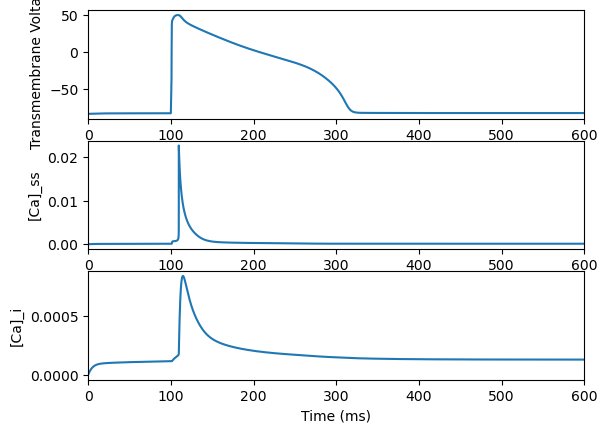

In [15]:
# Plot solutions
V, Nai, m, h, j, O, O_Ca, C0, C1, C2, C3, C4, C_Ca0, C_Ca1, C_Ca2, C_Ca3, C_Ca4, Ca_SS, Ko, Ki, y, X, Cai, P_O1, P_O2, P_C1, P_C2, Ca_JSR, Ca_NSR, HTRPNCa, LTRPNCa = solution.y
time = solution.t

plt.subplot(3,1,1)
plt.plot(time, V)
plt.ylabel('Transmembrane Voltage')
plt.xlabel('Time (ms)')
plt.xlim(0, 600)
plt.subplot(3,1,2)
plt.plot(time, Ca_SS)
plt.ylabel('[Ca]_ss')
plt.xlabel('Time (ms)')
plt.xlim(0, 600)
plt.subplot(3,1,3)
plt.plot(time, Cai)
plt.ylabel('[Ca]_i')
plt.xlabel('Time (ms)')
plt.xlim(0, 600)
plt.show()

**Exercise 4a) The ryanodine receptors**

The model used by Jafri et al. is based on the Keizer and Levine model. This model consists of 4 states (2 open and 2 closed states). The transitions between $P_{C1}$ and $P_{O1}$ and from $P_{O1}$ to $P_{O2}$ are calcium dependent. Since the RyRs are placed on the subspace the calcium dependency is based on the subspace calcium concentration $Ca^{2+}_{ss}$. In order to go from closed to the first opened calcium state an increase in subspace calcium is needed. In the first open state $P_{O1}$ the receptor can close adapting to its transition $P_{C2}$. However, if the $Ca^{2+}_{ss}$ further increases the channel reopens to state $P_{O2}$. This mechanism allows the modelling of calcium induced calcium release. 

<img src="fig/RyR_Jafri.png" width=500>

Write out the ODEs for the four state variable model and decide based on the model diagram which calcium concentration should be used to determine the opening of the ryanodine receptors. Implement the RyR model in the corresponding place in the code.

**Exercise 4b) The NCX formulation**

Today we have learned a quite complex but very realistic formulation of the NCX by Luo & Rudy (1994):

$$I_{\rm NaCa} = k_{\rm NaCa}
\frac{
{\rm[Na^+]^3_i [Ca^{2+}]_e} \cdot {\rm exp}\left[\eta\cdot V\cdot\frac{F}{RT}\right]
- {\rm[Na^+]^3_e [Ca^{2+}]_i} \cdot {\rm exp}\left[(\eta-1)\cdot V\cdot\frac{F}{RT}\right]
}{
\left(K_{\rm m, Na}^3 + [{\rm Na}^+]_{\rm e}^3\right)
\left(K_{\rm m, Ca} + [{\rm Ca}^{2+}]_{\rm e}\right)
\left(1 + k_{\rm sat}\cdot {\rm exp}\left[(\eta-1)\cdot V\cdot\frac{F}{RT}\right]\right)}
$$

This expression is also used in the Jafri et al. model. Implement this formulation in the code.

**Exercise 4c) The Calcium subsystem**

As mentioned above this model differenciates between 4 different compartmental calcium concentrations. $Ca^{2+}_{ss}$ and $Ca^{2+}_{i}$ represent the intracellular calcium restricted to the subspace and the intracellular bulk calcium concentrations respectively. $Ca^{2+}_{JSR}$ and $Ca^{2+}_{NSR}$ represent the calcium concentration in the JSR and NSR which are two subregions within the sarcoplasmic reticulum.
Based on the following diagram write the equations for the 4 different calcium concentraction changes as we did in exercise 3b.

<img src="fig/Jafri_extended.png" width=800>

Note that the transmembrane currents are given in Ampere, which measures the electron flow per second. However, we want to calculate the concentration, which for chemical species is often given in molar (mol/L). For this reason if the calcium concentrations are affected by Ampere currents consider using the unit conversion factors "conv_Amp_SS" and "conv_Amp_myo" which depend on the subspace (SS) and the myoplasm (myo) volume respectively.

Please keep in mind to also consider the different compartmental volumes.

A further aspect to consider is the buffering effects that affect the calcium concentration. In this model calmodulin and calsequestrin act as buffer. The factors $B_i$, $B_{ss}$ and $B_{JSR}$ can be calculated based on the buffer and calcium concentration in the corresponding compartment. To keep it simple, we have prefilled the buffering factors into the calcium concentration equations and you can fill out which currents and fluxes affect the corresponding concentrations.

**Exercise 4d) Calculating the transmembrane potential**

We learned in L3 that the transmembrane potential can be calculated with the total membrane current and the membrane capacitance:

$$ \frac{dV}{dt} = \frac{I_m}{Cm} $$

Based on this equation and the upper diagram fill in the transmembrane currents into the code to calculate the transmembrane potential, and thus the action potential. 